In [62]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [63]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# <font color = blue> IMDb Movie Assignment </font>

You have the data for the 100 top-rated movies from the past decade along with various pieces of information about the movie, its actors, and the voters who have rated these movies online. In this assignment, you will try to find some interesting insights into these movies and their voters, using Python.

##  Task 1: Reading the data

- ### Subtask 1.1: Read the Movies Data.

Read the movies data file provided and store it in a dataframe `movies`.

In [64]:
# Read the csv file using 'read_csv'. Please write your dataset location here.
movies=pd.read_csv('Movie+Assignment+Data.csv')  # i done through this in jupyter notebook .first upload data file in jupyter after i done this syntax
movies

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Whiplash,2014,3300000,13092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.3,8.2,8.1,8.1,8.2,8.0,8.6,8.4,R,USA
96,Before Midnight,2013,3000000,8114507,Seamus Davey-Fitzpatrick,Ariane Labed,Athina Rachel Tsangari,140,63.0,48.0,...,7.8,7.6,7.3,7.4,7.2,7.0,8.0,7.9,R,USA
97,Star Wars: Episode VII - The Force Awakens,2015,245000000,936662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA
98,Harry Potter and the Deathly Hallows: Part I,2010,150000000,296347721,Rupert Grint,Toby Jones,Alfred Enoch,10000,2000.0,1000.0,...,7.3,8.1,7.4,7.3,8.0,6.7,7.9,7.5,PG-13,UK


- ###  Subtask 1.2: Inspect the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [65]:
# Check the number of rows and columns in the dataframe
movies.shape


(100, 62)

In [66]:
# Check the column-wise info of the dataframe

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   100 non-null    object 
 1   title_year              100 non-null    int64  
 2   budget                  100 non-null    int64  
 3   Gross                   100 non-null    int64  
 4   actor_1_name            100 non-null    object 
 5   actor_2_name            100 non-null    object 
 6   actor_3_name            100 non-null    object 
 7   actor_1_facebook_likes  100 non-null    int64  
 8   actor_2_facebook_likes  99 non-null     float64
 9   actor_3_facebook_likes  98 non-null     float64
 10  IMDb_rating             100 non-null    float64
 11  genre_1                 100 non-null    object 
 12  genre_2                 97 non-null     object 
 13  genre_3                 74 non-null     object 
 14  MetaCritic              95 non-null     flo

In [67]:
# Check the summary for the numeric columns 

movies.describe()

,title_year,budget,Gross,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,MetaCritic,Runtime,CVotes10,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
count,100.000000,1.000000e+02,1.000000e+02,100.000000,99.000000,98.000000,100.000000,95.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2012.820000,7.838400e+07,1.468679e+08,13407.270000,7377.303030,3002.153061,7.883000,78.252632,126.420000,73212.160000,...,7.982000,7.732000,7.723000,7.780000,7.65100,7.624000,7.770000,7.274000,7.958000,7.793000
std,1.919491,7.445295e+07,1.454004e+08,10649.037862,13471.568216,6940.301133,0.247433,9.122066,19.050799,82669.594746,...,0.321417,0.251814,0.260479,0.282128,0.21485,0.213258,0.301344,0.361987,0.232327,0.264099
min,2010.000000,3.000000e+06,2.238380e+05,39.000000,12.000000,0.000000,7.500000,62.000000,91.000000,6420.000000,...,7.300000,7.300000,7.200000,7.200000,7.10000,7.100000,7.000000,6.400000,7.500000,7.300000
25%,2011.000000,1.575000e+07,4.199752e+07,1000.000000,580.000000,319.750000,7.700000,72.000000,114.750000,30587.000000,...,7.700000,7.600000,7.500000,7.600000,7.50000,7.475000,7.500000,7.100000,7.800000,7.600000
50%,2013.000000,4.225000e+07,1.070266e+08,13000.000000,1000.000000,626.500000,7.800000,78.000000,124.000000,54900.500000,...,8.000000,7.700000,7.700000,7.800000,7.65000,7.600000,7.800000,7.300000,7.950000,7.750000
75%,2014.000000,1.500000e+08,2.107548e+08,20000.000000,11000.000000,1000.000000,8.100000,83.500000,136.250000,80639.000000,...,8.200000,7.900000,7.900000,8.000000,7.80000,7.800000,7.925000,7.500000,8.100000,7.925000
max,2016.000000,2.600000e+08,9.366622e+08,35000.000000,96000.000000,46000.000000,8.800000,100.000000,180.000000,584839.000000,...,8.800000,8.700000,8.700000,8.500000,8.10000,8.100000,8.500000,8.200000,8.700000,8.800000


## Task 2: Data Analysis

Now that we have loaded the dataset and inspected it, we see that most of the data is in place. As of now, no data cleaning is required, so let's start with some data manipulation, analysis, and visualisation to get various insights about the data. 

-  ###  Subtask 2.1: Reduce those Digits!

These numbers in the `budget` and `gross` are too big, compromising its readability. Let's convert the unit of the `budget` and `gross` columns from `$` to `million $` first.

In [68]:
# Divide the 'gross' and 'budget' columns by 1000000 to convert '$' to 'million $'
movies['Gross'] = movies['Gross'] / 1000000
movies['budget'] = movies['budget'] / 1000000
movies

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30.0,151.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Whiplash,2014,3.3,13.092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.3,8.2,8.1,8.1,8.2,8.0,8.6,8.4,R,USA
96,Before Midnight,2013,3.0,8.114507,Seamus Davey-Fitzpatrick,Ariane Labed,Athina Rachel Tsangari,140,63.0,48.0,...,7.8,7.6,7.3,7.4,7.2,7.0,8.0,7.9,R,USA
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA
98,Harry Potter and the Deathly Hallows: Part I,2010,150.0,296.347721,Rupert Grint,Toby Jones,Alfred Enoch,10000,2000.0,1000.0,...,7.3,8.1,7.4,7.3,8.0,6.7,7.9,7.5,PG-13,UK


-  ###  Subtask 2.2: Let's Talk Profit!

    1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`.
    4. Plot a scatter or a joint plot between the columns `budget` and `profit` and write a few words on what you observed.
    5. Extract the movies with a negative profit and store them in a new dataframe - `neg_profit`

In [49]:
# Create the new column named 'profit' by subtracting the 'budget' column from the 'gross' column
movies['profit'] = movies['Gross'] - movies['budget']
movies

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
0,La La Land,2016,30.0,151.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA,121.101803
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191.268248
2,Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia,39.738905
3,Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA,53.546139
4,Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA,38.695371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Whiplash,2014,3.3,13.092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.2,8.1,8.1,8.2,8.0,8.6,8.4,R,USA,9.792000
96,Before Midnight,2013,3.0,8.114507,Seamus Davey-Fitzpatrick,Ariane Labed,Athina Rachel Tsangari,140,63.0,48.0,...,7.6,7.3,7.4,7.2,7.0,8.0,7.9,R,USA,5.114507
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225
98,Harry Potter and the Deathly Hallows: Part I,2010,150.0,296.347721,Rupert Grint,Toby Jones,Alfred Enoch,10000,2000.0,1000.0,...,8.1,7.4,7.3,8.0,6.7,7.9,7.5,PG-13,UK,146.347721


In [50]:
# Sort the dataframe with the 'profit' column as reference using the 'sort_values' function. Make sure to set the argument
#'ascending' to 'False'
movies_sorted = movies.sort_values(by='profit', ascending=False)
movies.sort_values(by='profit', ascending=False, inplace=True)
movies

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225
11,The Avengers,2012,220.0,623.279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,...,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.279547
47,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263
32,The Hunger Games: Catching Fire,2013,130.0,424.645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,...,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.645577
12,Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.984497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,Scott Pilgrim vs. the World,2010,60.0,31.494270,Anna Kendrick,Kieran Culkin,Ellen Wong,10000,1000.0,719.0,...,7.2,7.1,7.1,7.0,6.6,7.8,7.4,PG-13,USA,-28.505730
7,Tangled,2010,260.0,200.807262,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.0,284.0,...,8.0,7.7,7.6,7.9,6.9,7.9,7.7,PG,USA,-59.192738
17,Edge of Tomorrow,2014,178.0,100.189501,Tom Cruise,Lara Pulver,Noah Taylor,10000,854.0,509.0,...,7.7,7.8,7.8,7.8,7.5,8.0,7.8,PG-13,USA,-77.810499
39,The Little Prince,2015,81.2,1.339152,Jeff Bridges,James Franco,Mackenzie Foy,12000,11000.0,6000.0,...,7.9,7.5,7.4,7.9,6.6,7.7,7.7,PG,France,-79.860848


In [51]:
# Get the top 10 profitable movies by using position based indexing. Specify the rows till 10 (0-9)
movies.iloc[:10]


,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225
11,The Avengers,2012,220.0,623.279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,...,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.279547
47,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263
32,The Hunger Games: Catching Fire,2013,130.0,424.645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,...,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.645577
12,Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.984497
8,The Dark Knight Rises,2012,250.0,448.130642,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,...,8.2,7.9,7.9,7.9,7.8,8.4,8.4,PG-13,USA,198.130642
45,The Lego Movie,2014,60.0,257.756197,Morgan Freeman,Will Ferrell,Alison Brie,11000,8000.0,2000.0,...,7.5,7.4,7.4,7.4,7.2,8.0,7.6,PG,Australia,197.756197
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191.268248
41,Despicable Me,2010,69.0,251.501645,Steve Carell,Miranda Cosgrove,Jack McBrayer,7000,2000.0,975.0,...,7.9,7.6,7.5,7.9,7.0,7.6,7.6,PG,USA,182.501645
18,Inside Out,2015,175.0,356.454367,Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.0,384.0,...,8.1,7.9,7.9,7.9,7.6,8.2,8.1,PG,USA,181.454367


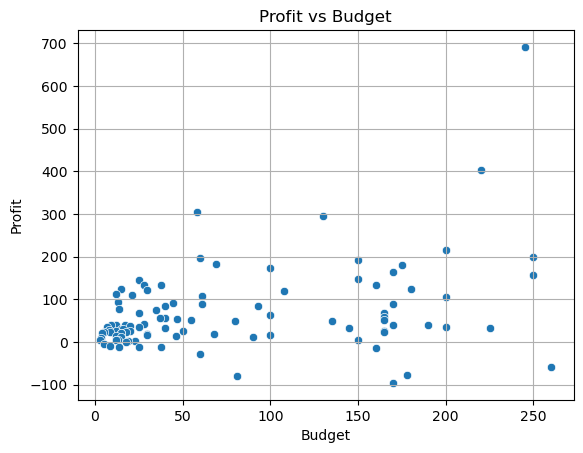

In [52]:
#Plot profit vs budget
sns.scatterplot(x='budget',y='profit',data=movies)
plt.title("Profit vs Budget")
plt.xlabel("Budget")
plt.ylabel("Profit")
plt.grid(True)

The dataset contains the 100 best performing movies from the year 2010 to 2016. However scatter plot tells a different story. You can notice that there are some movies with negative profit. Although good movies do incur losses, but there appear to be quite a few movie with losses. What can be the reason behind this? Lets have a closer look at this by finding the movies with negative profit.

In [53]:
#Find the movies with negative profit
movies[movies['profit'] < 0]


,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
99,Tucker and Dale vs Evil,2010,5.0,0.223838,Katrina Bowden,Tyler Labine,Chelan Simmons,948,779.0,440.0,...,7.7,7.5,7.4,7.7,7.1,7.7,7.5,R,Canada,-4.776162
89,Amour,2012,8.9,0.225377,Isabelle Huppert,Emmanuelle Riva,Jean-Louis Trintignant,678,432.0,319.0,...,7.9,7.9,7.8,8.1,7.2,7.9,7.8,PG-13,France,-8.674623
56,Rush,2013,38.0,26.903709,Chris Hemsworth,Olivia Wilde,Alexandra Maria Lara,26000,10000.0,471.0,...,7.9,7.8,7.8,7.8,7.1,7.9,8.1,R,UK,-11.096291
66,Warrior,2011,25.0,13.651662,Tom Hardy,Frank Grillo,Kevin Dunn,27000,798.0,581.0,...,8.0,7.7,7.7,7.5,7.1,8.2,8.1,PG-13,USA,-11.348338
82,Flipped,2010,14.0,1.752214,Madeline Carroll,Rebecca De Mornay,Aidan Quinn,1000,872.0,767.0,...,7.7,7.4,7.3,7.6,6.4,7.5,7.7,PG,USA,-12.247786
28,X-Men: First Class,2011,160.0,146.405371,Jennifer Lawrence,Michael Fassbender,Oliver Platt,34000,13000.0,1000.0,...,7.8,7.6,7.5,7.7,7.3,7.8,7.7,PG-13,USA,-13.594629
46,Scott Pilgrim vs. the World,2010,60.0,31.494270,Anna Kendrick,Kieran Culkin,Ellen Wong,10000,1000.0,719.0,...,7.2,7.1,7.1,7.0,6.6,7.8,7.4,PG-13,USA,-28.505730
7,Tangled,2010,260.0,200.807262,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.0,284.0,...,8.0,7.7,7.6,7.9,6.9,7.9,7.7,PG,USA,-59.192738
17,Edge of Tomorrow,2014,178.0,100.189501,Tom Cruise,Lara Pulver,Noah Taylor,10000,854.0,509.0,...,7.7,7.8,7.8,7.8,7.5,8.0,7.8,PG-13,USA,-77.810499
39,The Little Prince,2015,81.2,1.339152,Jeff Bridges,James Franco,Mackenzie Foy,12000,11000.0,6000.0,...,7.9,7.5,7.4,7.9,6.6,7.7,7.7,PG,France,-79.860848


**`Checkpoint 1:`** Can you spot the movie `Tangled` in the dataset? You may be aware of the movie 'Tangled'. Although its one of the highest grossing movies of all time, it has negative profit as per this result. If you cross check the gross values of this movie (link: https://www.imdb.com/title/tt0398286/), you can see that the gross in the dataset accounts only for the domestic gross and not the worldwide gross. This is true for may other movies also in the list.

- ### Subtask 2.3: The General Audience and the Critics

You might have noticed the column `MetaCritic` in this dataset. This is a very popular website where an average score is determined through the scores given by the top-rated critics. Second, you also have another column `IMDb_rating` which tells you the IMDb rating of a movie. This rating is determined by taking the average of hundred-thousands of ratings from the general audience. 

As a part of this subtask, you are required to find out the highest rated movies which have been liked by critics and audiences alike.
1. Firstly you will notice that the `MetaCritic` score is on a scale of `100` whereas the `IMDb_rating` is on a scale of 10. First convert the `MetaCritic` column to a scale of 10.
2. Now, to find out the movies which have been liked by both critics and audiences alike and also have a high rating overall, you need to -
    - Create a new column `Avg_rating` which will have the average of the `MetaCritic` and `Rating` columns
    - Retain only the movies in which the absolute difference(using abs() function) between the `IMDb_rating` and `Metacritic` columns is less than 0.5. Refer to this link to know how abs() funtion works - https://www.geeksforgeeks.org/abs-in-python/ .
    - Sort these values in a descending order of `Avg_rating` and retain only the movies with a rating equal to higher than `8` and store these movies in a new dataframe `UniversalAcclaim`.
    

In [54]:
# Change the scale of MetaCritic

movies['MetaCritic']= movies['MetaCritic']/10


In [55]:
# Find the average ratings

movies['Avg_rating']=(movies['MetaCritic']+movies['IMDb_rating'])/2
movies

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225,8.10
11,The Avengers,2012,220.0,623.279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,...,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.279547,7.50
47,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263,7.25
32,The Hunger Games: Catching Fire,2013,130.0,424.645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,...,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.645577,7.60
12,Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.984497,8.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,Scott Pilgrim vs. the World,2010,60.0,31.494270,Anna Kendrick,Kieran Culkin,Ellen Wong,10000,1000.0,719.0,...,7.1,7.1,7.0,6.6,7.8,7.4,PG-13,USA,-28.505730,7.20
7,Tangled,2010,260.0,200.807262,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.0,284.0,...,7.7,7.6,7.9,6.9,7.9,7.7,PG,USA,-59.192738,7.45
17,Edge of Tomorrow,2014,178.0,100.189501,Tom Cruise,Lara Pulver,Noah Taylor,10000,854.0,509.0,...,7.8,7.8,7.8,7.5,8.0,7.8,PG-13,USA,-77.810499,7.50
39,The Little Prince,2015,81.2,1.339152,Jeff Bridges,James Franco,Mackenzie Foy,12000,11000.0,6000.0,...,7.5,7.4,7.9,6.6,7.7,7.7,PG,France,-79.860848,7.40


In [56]:
#Sort in descending order of average rating
movies.sort_values(by='Avg_rating',ascending=False,inplace=True)
movies

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating
94,Boyhood,2014,4.0,25.359200,Ellar Coltrane,Lorelei Linklater,Libby Villari,230,193.0,127.0,...,7.7,7.7,7.7,7.2,8.0,7.9,R,USA,21.359200,8.95
69,12 Years a Slave,2013,20.0,56.667870,QuvenzhanÃ© Wallis,Scoot McNairy,Taran Killam,2000,660.0,500.0,...,7.8,7.8,8.1,7.7,8.3,8.0,R,USA,36.667870,8.85
18,Inside Out,2015,175.0,356.454367,Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.0,384.0,...,7.9,7.9,7.9,7.6,8.2,8.1,PG,USA,181.454367,8.80
12,Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.984497,8.75
4,Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.6,7.6,7.6,7.1,7.9,7.8,R,USA,38.695371,8.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,The Hobbit: An Unexpected Journey,2012,180.0,303.001229,Aidan Turner,Adam Brown,James Nesbitt,5000,972.0,773.0,...,7.7,7.6,8.0,7.5,7.8,7.8,PG-13,USA,123.001229,NaN
52,Lone Survivor,2013,40.0,125.069696,Jerry Ferrara,Scott Elrod,Dan Bilzerian,480,449.0,127.0,...,7.5,7.4,7.8,6.8,7.8,7.3,R,USA,85.069696,NaN
88,About Time,2013,12.0,15.294553,Tom Hughes,Tom Hollander,Lindsay Duncan,565,555.0,171.0,...,7.6,7.5,7.8,6.9,7.8,7.7,R,UK,3.294553,NaN
71,The Book Thief,2013,19.0,21.483154,Emily Watson,Sophie NÃ©lisse,Roger Allam,876,526.0,326.0,...,7.6,7.5,8.0,6.6,7.6,7.5,PG-13,USA,2.483154,NaN


In [57]:
# Find the movies with metacritic-rating < 0.5 and also with the average rating of >8

movies = movies[abs(movies['MetaCritic'] - movies['IMDb_rating']) < 0.5]
UniversalAcclaim = movies[movies['Avg_rating'] >= 8]
UniversalAcclaim

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating
95,Whiplash,2014,3.3,13.092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.1,8.1,8.2,8.0,8.6,8.4,R,USA,9.792000,8.65
35,Django Unchained,2012,100.0,162.804648,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000.0,265.0,...,8.0,8.0,8.1,7.8,8.4,8.4,R,USA,62.804648,8.25
93,Dallas Buyers Club,2013,5.0,27.296514,Matthew McConaughey,Jennifer Garner,Denis O'Hare,11000,3000.0,896.0,...,7.8,7.8,8.0,7.2,8.0,7.9,R,USA,22.296514,8.20
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225,8.10
3,Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA,53.546139,8.05
33,The Martian,2015,108.0,228.430993,Matt Damon,Donald Glover,Benedict Wong,13000,801.0,372.0,...,8.0,7.9,8.2,7.8,8.1,7.9,PG-13,USA,120.430993,8.00
43,Gone Girl,2014,61.0,167.735396,Patrick Fugit,Sela Ward,Emily Ratajkowski,835,812.0,625.0,...,7.7,7.7,7.7,7.6,8.1,8.1,R,USA,106.735396,8.00


**`Checkpoint 2:`** Can you spot a `Star Wars` movie in your final dataset?

- ### Subtask 2.4: Find the Most Popular Trios - I

You're a producer looking to make a blockbuster movie. There will primarily be three lead roles in your movie and you wish to cast the most popular actors for it. Now, since you don't want to take a risk, you will cast a trio which has already acted in together in a movie before. The metric that you've chosen to check the popularity is the Facebook likes of each of these actors.

The dataframe has three columns to help you out for the same, viz. `actor_1_facebook_likes`, `actor_2_facebook_likes`, and `actor_3_facebook_likes`. Your objective is to find the trios which has the most number of Facebook likes combined. That is, the sum of `actor_1_facebook_likes`, `actor_2_facebook_likes` and `actor_3_facebook_likes` should be maximum.
Find out the top 5 popular trios, and output their names in a list.


In [58]:
# Write your code here
movies['combined_facebook_likes']=movies['actor_1_facebook_likes']+movies['actor_2_facebook_likes']+movies['actor_3_facebook_likes']
top_5_trio =movies.sort_values(by='combined_facebook_likes',ascending=False).head(5)
top_5_trios_names=top_5_trio[['actor_1_name','actor_2_name','actor_3_name']].values.tolist()
top_5_trios_names


[['Jennifer Lawrence', 'Robert De Niro', 'Bradley Cooper'],
 ['Ginnifer Goodwin', 'Jason Bateman', 'Idris Elba'],
 ['Ryan Gosling', 'Christian Bale', 'Charlie Talbert'],
 ['Leonardo DiCaprio', 'Tom Hardy', 'Lukas Haas'],
 ['Robert Downey Jr.', 'Scarlett Johansson', 'Chris Evans']]

- ### Subtask 2.5: Find the Most Popular Trios - II

In the previous subtask you found the popular trio based on the total number of facebook likes. Let's add a small condition to it and make sure that all three actors are popular. The condition is **none of the three actors' Facebook likes should be less than half of the other two**. For example, the following is a valid combo:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 50000

But the below one is not:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 30000

since in this case, `actor_3_facebook_likes` is 30000, which is less than half of `actor_1_facebook_likes`.

Having this condition ensures that you aren't getting any unpopular actor in your trio (since the total likes calculated in the previous question doesn't tell anything about the individual popularities of each actor in the trio.).

You can do a manual inspection of the top 5 popular trios you have found in the previous subtask and check how many of those trios satisfy this condition. Also, which is the most popular trio after applying the condition above?

**Write your answers below.**

- **`No. of trios that satisfy the above condition:`**

- **`Most popular trio after applying the condition:`**

**`Optional:`** Even though you are finding this out by a natural inspection of the dataframe, can you also achieve this through some *if-else* statements to incorporate this. You can try this out on your own time after you are done with the assignment.

In [59]:
# Your answer here (optional)



- ### Subtask 2.6: Runtime Analysis

There is a column named `Runtime` in the dataframe which primarily shows the length of the movie. It might be intersting to see how this variable this distributed. Plot a `histogram` or `distplot` of seaborn to find the `Runtime` range most of the movies fall into.

Text(0, 0.5, 'Frequency')

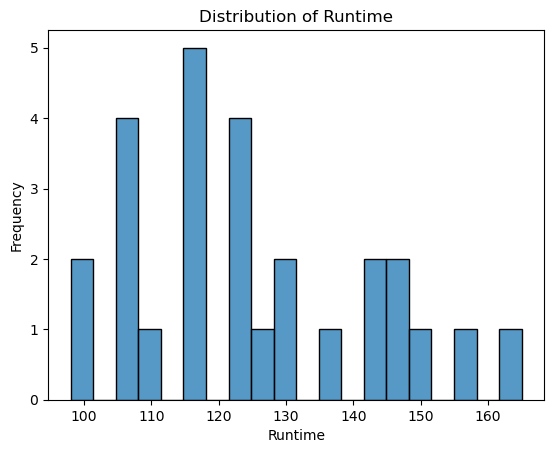

In [19]:
# Runtime histogram/density plot
sns.histplot(x='Runtime',data=movies,bins=20)
plt.title('Distribution of Runtime')
plt.xlabel('Runtime')
plt.ylabel('Frequency')

**`Checkpoint 3:`** Most of the movies appear to be sharply 2 hour-long.

- ### Subtask 2.7: R-Rated Movies

Although R rated movies are restricted movies for the under 18 age group, still there are vote counts from that age group. Among all the R rated movies that have been voted by the under-18 age group, find the top 10 movies that have the highest number of votes i.e.`CVotesU18` from the `movies` dataframe. Store these in a dataframe named `PopularR`.

In [20]:
# Write your code here
r=movies[movies['content_rating'] == 'R']
PopularR=r.sort_values(by='CVotesU18',ascending=False).head(10)
PopularR

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating,combined_facebook_likes
35,Django Unchained,2012,100.0,162.804648,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000.0,265.0,...,8.0,8.1,7.8,8.4,8.4,R,USA,62.804648,8.25,40265.0
95,Whiplash,2014,3.3,13.092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.1,8.2,8.0,8.6,8.4,R,USA,9.792000,8.65,25505.0
31,The Revenant,2015,135.0,183.635922,Leonardo DiCaprio,Tom Hardy,Lukas Haas,29000,27000.0,733.0,...,7.8,7.8,7.6,8.1,7.9,R,USA,48.635922,7.80,56733.0
43,Gone Girl,2014,61.0,167.735396,Patrick Fugit,Sela Ward,Emily Ratajkowski,835,812.0,625.0,...,7.7,7.7,7.6,8.1,8.1,R,USA,106.735396,8.00,2272.0
68,Silver Linings Playbook,2012,21.0,132.088910,Jennifer Lawrence,Robert De Niro,Bradley Cooper,34000,22000.0,14000.0,...,7.6,7.7,6.9,8.0,7.6,R,USA,111.088910,7.95,70000.0
90,Nightcrawler,2014,8.5,32.279955,Jake Gyllenhaal,Michael Papajohn,James Huang,15000,241.0,85.0,...,7.7,7.7,7.8,8.0,7.8,R,USA,23.779955,7.75,15326.0
80,Ex Machina,2014,15.0,25.440971,Elina Alminas,Sonoya Mizuno,Corey Johnson,149,145.0,123.0,...,7.6,7.4,7.5,7.9,7.7,R,UK,10.440971,7.75,417.0
83,Black Swan,2010,13.0,106.952327,Natalie Portman,Mila Kunis,Mark Margolis,20000,15000.0,1000.0,...,7.5,7.4,7.6,8.0,8.0,R,USA,93.952327,7.95,36000.0
62,The Big Short,2015,28.0,70.235322,Ryan Gosling,Christian Bale,Charlie Talbert,33000,23000.0,767.0,...,7.7,7.8,7.3,7.9,7.7,R,USA,42.235322,7.95,56767.0
93,Dallas Buyers Club,2013,5.0,27.296514,Matthew McConaughey,Jennifer Garner,Denis O'Hare,11000,3000.0,896.0,...,7.8,8.0,7.2,8.0,7.9,R,USA,22.296514,8.20,14896.0


**`Checkpoint 4:`** Are these kids watching `Deadpool` a lot?

no

## Task 3 : Demographic analysis

If you take a look at the last columns in the dataframe, most of these are related to demographics of the voters (in the last subtask, i.e., 2.8, you made use one of these columns - CVotesU18). We also have three genre columns indicating the genres of a particular movie. We will extensively use these columns for the third and the final stage of our assignment wherein we will analyse the voters across all demographics and also see how these vary across various genres. So without further ado, let's get started with `demographic analysis`.

-  ###  Subtask 3.1 Combine the Dataframe by Genres

There are 3 columns in the dataframe - `genre_1`, `genre_2`, and `genre_3`. As a part of this subtask, you need to aggregate a few values over these 3 columns. 
1. First create a new dataframe `df_by_genre` that contains `genre_1`, `genre_2`, and `genre_3` and all the columns related to **CVotes/Votes** from the `movies` data frame. There are 47 columns to be extracted in total.
2. Now, Add a column called `cnt` to the dataframe `df_by_genre` and initialize it to one. You will realise the use of this column by the end of this subtask.
3. First group the dataframe `df_by_genre` by `genre_1` and find the sum of all the numeric columns such as `cnt`, columns related to CVotes and Votes columns and store it in a dataframe `df_by_g1`.
4. Perform the same operation for `genre_2` and `genre_3` and store it dataframes `df_by_g2` and `df_by_g3` respectively. 
5. Now that you have 3 dataframes performed by grouping over `genre_1`, `genre_2`, and `genre_3` separately, it's time to combine them. For this, add the three dataframes and store it in a new dataframe `df_add`, so that the corresponding values of Votes/CVotes get added for each genre.There is a function called `add()` in pandas which lets you do this. You can refer to this link to see how this function works. https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.add.html
6. The column `cnt` on aggregation has basically kept the track of the number of occurences of each genre.Subset the genres that have atleast 10 movies into a new dataframe `genre_top10` based on the `cnt` column value.
7. Now, take the mean of all the numeric columns by dividing them with the column value `cnt` and store it back to the same dataframe. We will be using this dataframe for further analysis in this task unless it is explicitly mentioned to use the dataframe `movies`.
8. Since the number of votes can't be a fraction, type cast all the CVotes related columns to integers. Also, round off all the Votes related columns upto two digits after the decimal point.


In [21]:
# Create the dataframe df_by_genre
columns_to_extract = ['genre_1', 'genre_2', 'genre_3'] + [col for col in movies.columns if 'CVotes' in col or 'Votes' in col]
df_by_genre = movies[columns_to_extract]


In [22]:
# Create a column cnt and initialize it to 1

df_by_genre['cnt']=1

In [23]:
# Group the movies by individual genres

df_by_g1 = df_by_genre.groupby('genre_1').sum(numeric_only=True).reset_index()
df_by_g2 = df_by_genre.groupby('genre_2').sum(numeric_only=True).reset_index()
df_by_g3 = df_by_genre.groupby('genre_3').sum(numeric_only=True).reset_index()


In [24]:
# Add the grouped data frames and store it in a new data frame
df_by_g1.set_index('genre_1', inplace=True)
df_by_g2.set_index('genre_2', inplace=True)
df_by_g3.set_index('genre_3', inplace=True)

df_add = df_by_g1.add(df_by_g2, fill_value=0).add(df_by_g3, fill_value=0)
df_add.reset_index(inplace=True)


In [25]:
# Extract genres with atleast 10 occurences
df_add = df_add.rename(columns={
    'index': 'genres'
})
genre_top10=df_add.sort_values(by='cnt',ascending=False).head(10)
genre_top10

,genres,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
6,Drama,1126039.0,1839012.0,2545242.0,1452195.0,500890.0,177995.0,77350.0,44745.0,30178.0,...,140.1,140.3,139.0,138.5,138.3,139.3,134.1,144.3,141.1,18.0
1,Adventure,791550.0,1030315.0,1558689.0,1022028.0,379902.0,134453.0,54357.0,30413.0,20075.0,...,92.0,91.6,93.7,91.9,91.4,94.7,88.5,95.2,92.3,12.0
0,Action,589128.0,712995.0,1123801.0,768564.0,293359.0,104925.0,42530.0,23865.0,15711.0,...,68.6,68.2,70.2,68.3,67.9,70.6,65.5,71.1,68.7,9.0
12,Thriller,298104.0,472099.0,745754.0,469277.0,169515.0,61537.0,26845.0,15810.0,10293.0,...,38.6,38.6,38.1,38.1,38.1,38.3,37.4,39.9,38.8,5.0
3,Biography,94678.0,198128.0,387678.0,212513.0,59999.0,17435.0,6277.0,3218.0,2077.0,...,30.9,30.8,31.0,31.0,30.9,31.4,28.9,31.6,31.0,4.0
4,Comedy,187290.0,283170.0,484043.0,312261.0,111870.0,40205.0,15886.0,8312.0,5455.0,...,30.6,30.7,30.8,30.7,30.7,31.4,28.9,31.7,30.9,4.0
5,Crime,219003.0,383466.0,582830.0,346920.0,122082.0,44398.0,19925.0,11609.0,7975.0,...,30.8,31.0,30.2,30.2,30.2,30.3,30.0,31.9,31.2,4.0
9,Mystery,260071.0,413866.0,601645.0,373524.0,139139.0,50397.0,21739.0,12390.0,8281.0,...,30.6,30.6,31.0,30.2,30.1,30.7,29.1,31.7,31.1,4.0
11,Sci-Fi,242766.0,382368.0,550977.0,330276.0,119536.0,42387.0,17773.0,10074.0,6664.0,...,31.0,31.0,30.9,30.8,30.7,31.2,30.1,32.1,31.2,4.0
2,Animation,146573.0,178106.0,280805.0,172708.0,56740.0,16916.0,5654.0,2666.0,1621.0,...,23.1,22.9,24.0,23.0,22.9,23.9,22.0,23.7,23.4,3.0


In [26]:
# Take the mean for every column by dividing with cnt 

numeric_columns = [col for col in genre_top10.columns if col != 'cnt' and (col.startswith('CVotes') or col.startswith('Votes'))]

# Divide numeric columns by cnt
for col in numeric_columns:
    genre_top10[col] = genre_top10[col] / genre_top10['cnt']
cvotes_columns = [col for col in numeric_columns if col.startswith('CVotes')]
votes_columns = [col for col in numeric_columns if col.startswith('Votes')]
genre_top10

,genres,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
6,Drama,62557.722222,102167.333333,141402.333333,80677.500000,27827.222222,9888.611111,4297.222222,2485.833333,1676.555556,...,7.783333,7.794444,7.722222,7.694444,7.683333,7.738889,7.450000,8.016667,7.838889,18.0
1,Adventure,65962.500000,85859.583333,129890.750000,85169.000000,31658.500000,11204.416667,4529.750000,2534.416667,1672.916667,...,7.666667,7.633333,7.808333,7.658333,7.616667,7.891667,7.375000,7.933333,7.691667,12.0
0,Action,65458.666667,79221.666667,124866.777778,85396.000000,32595.444444,11658.333333,4725.555556,2651.666667,1745.666667,...,7.622222,7.577778,7.800000,7.588889,7.544444,7.844444,7.277778,7.900000,7.633333,9.0
12,Thriller,59620.800000,94419.800000,149150.800000,93855.400000,33903.000000,12307.400000,5369.000000,3162.000000,2058.600000,...,7.720000,7.720000,7.620000,7.620000,7.620000,7.660000,7.480000,7.980000,7.760000,5.0
3,Biography,23669.500000,49532.000000,96919.500000,53128.250000,14999.750000,4358.750000,1569.250000,804.500000,519.250000,...,7.725000,7.700000,7.750000,7.750000,7.725000,7.850000,7.225000,7.900000,7.750000,4.0
4,Comedy,46822.500000,70792.500000,121010.750000,78065.250000,27967.500000,10051.250000,3971.500000,2078.000000,1363.750000,...,7.650000,7.675000,7.700000,7.675000,7.675000,7.850000,7.225000,7.925000,7.725000,4.0
5,Crime,54750.750000,95866.500000,145707.500000,86730.000000,30520.500000,11099.500000,4981.250000,2902.250000,1993.750000,...,7.700000,7.750000,7.550000,7.550000,7.550000,7.575000,7.500000,7.975000,7.800000,4.0
9,Mystery,65017.750000,103466.500000,150411.250000,93381.000000,34784.750000,12599.250000,5434.750000,3097.500000,2070.250000,...,7.650000,7.650000,7.750000,7.550000,7.525000,7.675000,7.275000,7.925000,7.775000,4.0
11,Sci-Fi,60691.500000,95592.000000,137744.250000,82569.000000,29884.000000,10596.750000,4443.250000,2518.500000,1666.000000,...,7.750000,7.750000,7.725000,7.700000,7.675000,7.800000,7.525000,8.025000,7.800000,4.0
2,Animation,48857.666667,59368.666667,93601.666667,57569.333333,18913.333333,5638.666667,1884.666667,888.666667,540.333333,...,7.700000,7.633333,8.000000,7.666667,7.633333,7.966667,7.333333,7.900000,7.800000,3.0


In [27]:
# Rounding off the columns of Votes to two decimals

genre_top10[votes_columns] = genre_top10[votes_columns].round(2)
genre_top10

,genres,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
6,Drama,62557.722222,102167.333333,141402.333333,80677.500000,27827.222222,9888.611111,4297.222222,2485.833333,1676.555556,...,7.78,7.79,7.72,7.69,7.68,7.74,7.45,8.02,7.84,18.0
1,Adventure,65962.500000,85859.583333,129890.750000,85169.000000,31658.500000,11204.416667,4529.750000,2534.416667,1672.916667,...,7.67,7.63,7.81,7.66,7.62,7.89,7.38,7.93,7.69,12.0
0,Action,65458.666667,79221.666667,124866.777778,85396.000000,32595.444444,11658.333333,4725.555556,2651.666667,1745.666667,...,7.62,7.58,7.80,7.59,7.54,7.84,7.28,7.90,7.63,9.0
12,Thriller,59620.800000,94419.800000,149150.800000,93855.400000,33903.000000,12307.400000,5369.000000,3162.000000,2058.600000,...,7.72,7.72,7.62,7.62,7.62,7.66,7.48,7.98,7.76,5.0
3,Biography,23669.500000,49532.000000,96919.500000,53128.250000,14999.750000,4358.750000,1569.250000,804.500000,519.250000,...,7.72,7.70,7.75,7.75,7.72,7.85,7.22,7.90,7.75,4.0
4,Comedy,46822.500000,70792.500000,121010.750000,78065.250000,27967.500000,10051.250000,3971.500000,2078.000000,1363.750000,...,7.65,7.68,7.70,7.68,7.68,7.85,7.22,7.93,7.72,4.0
5,Crime,54750.750000,95866.500000,145707.500000,86730.000000,30520.500000,11099.500000,4981.250000,2902.250000,1993.750000,...,7.70,7.75,7.55,7.55,7.55,7.58,7.50,7.98,7.80,4.0
9,Mystery,65017.750000,103466.500000,150411.250000,93381.000000,34784.750000,12599.250000,5434.750000,3097.500000,2070.250000,...,7.65,7.65,7.75,7.55,7.52,7.68,7.28,7.93,7.78,4.0
11,Sci-Fi,60691.500000,95592.000000,137744.250000,82569.000000,29884.000000,10596.750000,4443.250000,2518.500000,1666.000000,...,7.75,7.75,7.72,7.70,7.68,7.80,7.52,8.02,7.80,4.0
2,Animation,48857.666667,59368.666667,93601.666667,57569.333333,18913.333333,5638.666667,1884.666667,888.666667,540.333333,...,7.70,7.63,8.00,7.67,7.63,7.97,7.33,7.90,7.80,3.0


In [28]:
# Converting CVotes to int type

genre_top10[cvotes_columns] = genre_top10[cvotes_columns].astype(int)
genre_top10

,genres,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
6,Drama,62557,102167,141402,80677,27827,9888,4297,2485,1676,...,7.78,7.79,7.72,7.69,7.68,7.74,7.45,8.02,7.84,18.0
1,Adventure,65962,85859,129890,85169,31658,11204,4529,2534,1672,...,7.67,7.63,7.81,7.66,7.62,7.89,7.38,7.93,7.69,12.0
0,Action,65458,79221,124866,85396,32595,11658,4725,2651,1745,...,7.62,7.58,7.80,7.59,7.54,7.84,7.28,7.90,7.63,9.0
12,Thriller,59620,94419,149150,93855,33903,12307,5369,3162,2058,...,7.72,7.72,7.62,7.62,7.62,7.66,7.48,7.98,7.76,5.0
3,Biography,23669,49532,96919,53128,14999,4358,1569,804,519,...,7.72,7.70,7.75,7.75,7.72,7.85,7.22,7.90,7.75,4.0
4,Comedy,46822,70792,121010,78065,27967,10051,3971,2078,1363,...,7.65,7.68,7.70,7.68,7.68,7.85,7.22,7.93,7.72,4.0
5,Crime,54750,95866,145707,86730,30520,11099,4981,2902,1993,...,7.70,7.75,7.55,7.55,7.55,7.58,7.50,7.98,7.80,4.0
9,Mystery,65017,103466,150411,93381,34784,12599,5434,3097,2070,...,7.65,7.65,7.75,7.55,7.52,7.68,7.28,7.93,7.78,4.0
11,Sci-Fi,60691,95592,137744,82569,29884,10596,4443,2518,1666,...,7.75,7.75,7.72,7.70,7.68,7.80,7.52,8.02,7.80,4.0
2,Animation,48857,59368,93601,57569,18913,5638,1884,888,540,...,7.70,7.63,8.00,7.67,7.63,7.97,7.33,7.90,7.80,3.0


If you take a look at the final dataframe that you have gotten, you will see that you now have the complete information about all the demographic (Votes- and CVotes-related) columns across the top 10 genres. We can use this dataset to extract exciting insights about the voters!

-  ###  Subtask 3.2: Genre Counts!

Now let's derive some insights from this data frame. Make a bar chart plotting different genres vs cnt using seaborn.

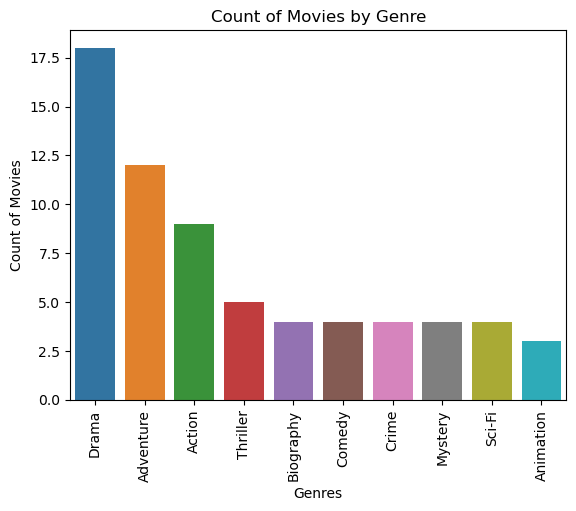

In [29]:
# Countplot for genres
sns.barplot(x='genres', y='cnt', data=genre_top10)
# Adding labels and title
plt.xlabel('Genres')
plt.ylabel('Count of Movies')
plt.title('Count of Movies by Genre')
plt.xticks(rotation=90)
plt.show()

**`Checkpoint 5:`** Is the bar for `Drama` the tallest? 
              YES

-  ###  Subtask 3.3: Gender and Genre

If you have closely looked at the Votes- and CVotes-related columns, you might have noticed the suffixes `F` and `M` indicating Female and Male. Since we have the vote counts for both males and females, across various age groups, let's now see how the popularity of genres vary between the two genders in the dataframe. 

1. Make the first heatmap to see how the average number of votes of males is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for males, i.e., `CVotesU18M`,`CVotes1829M`, `CVotes3044M`, and `CVotes45AM`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-male group. 

2. Make the second heatmap to see how the average number of votes of females is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for females, i.e., `CVotesU18F`,`CVotes1829F`, `CVotes3044F`, and `CVotes45AF`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-female group. 

3. Make sure that you plot these heatmaps side by side using `subplots` so that you can easily compare the two genders and derive insights.

4. Write your any three inferences from this plot. You can make use of the previous bar plot also here for better insights.
Refer to this link- https://seaborn.pydata.org/generated/seaborn.heatmap.html. You might have to plot something similar to the fifth chart in this page (You have to plot two such heatmaps side by side).

5. Repeat subtasks 1 to 4, but now instead of taking the CVotes-related columns, you need to do the same process for the Votes-related columns. These heatmaps will show you how the two genders have rated movies across various genres.

You might need the below link for formatting your heatmap.
https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot

-  Note : Use `genre_top10` dataframe for this subtask

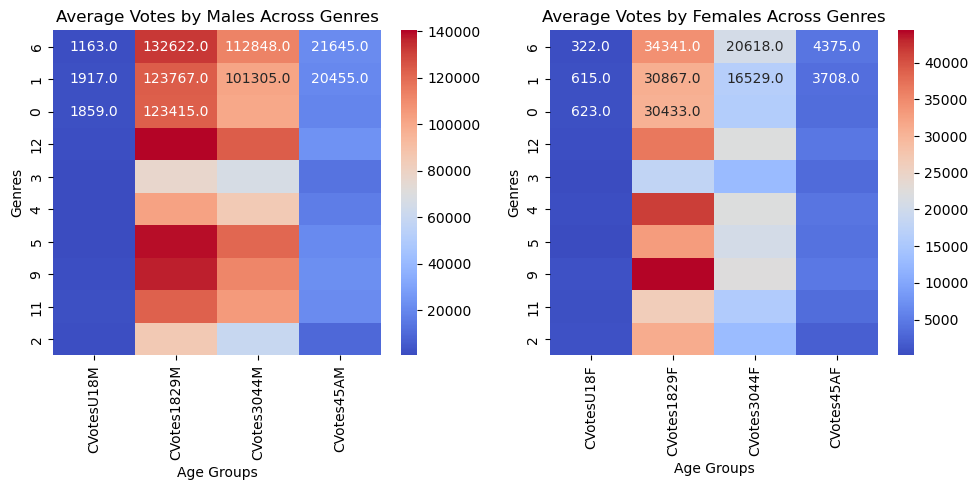

In [30]:
# 1st set of heat maps for CVotes-related columns
male_age_group=['CVotesU18M','CVotes1829M', 'CVotes3044M', 'CVotes45AM']
# Plotting the heatmaps
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
female_age_group=['CVotesU18F','CVotes1829F', 'CVotes3044F', 'CVotes45AF']
# Heatmap for Males
sns.heatmap(genre_top10[male_age_group], annot=True, fmt=".1f", cmap='coolwarm', ax=axes[0])
axes[0].set_title('Average Votes by Males Across Genres')
axes[0].set_xlabel('Age Groups') 
axes[0].set_ylabel('Genres')

# Heatmap for Females
sns.heatmap(genre_top10[female_age_group], annot=True, fmt=".1f", cmap='coolwarm', ax=axes[1])
axes[1].set_title('Average Votes by Females Across Genres')
axes[1].set_xlabel('Age Groups')
axes[1].set_ylabel('Genres')

plt.tight_layout()
plt.show()

**`Inferences:`** A few inferences that can be seen from the heatmap above is that males have voted more than females, and Sci-Fi appears to be most popular among the 18-29 age group irrespective of their gender. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- Inference 1:Males have voted more than females across most genres and age groups.
- Inference 2:The ‘Crime’ genre receives lower average votes overall, suggesting it might be less appealing to viewers.
- Inference 3:The 18-29 age group is the most active in voting across all genres for both males and females.

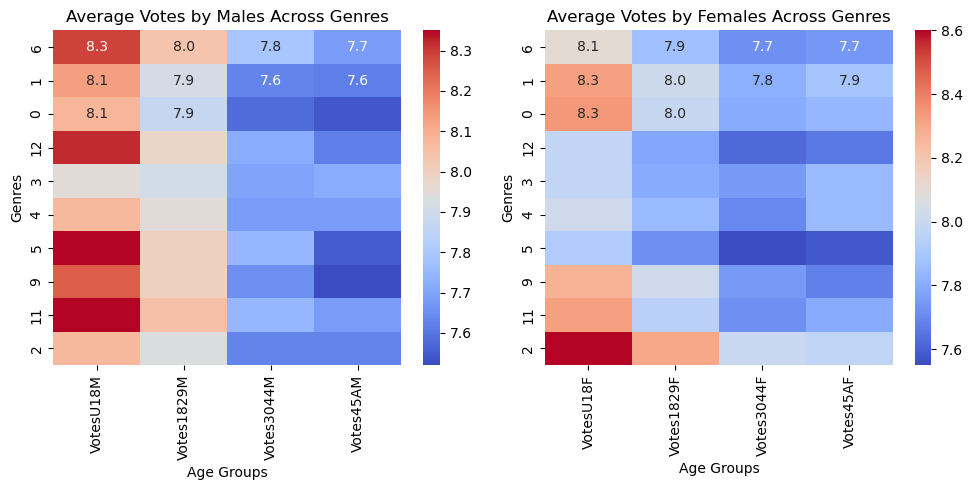

In [38]:
# 2nd set of heat maps for Votes-related columns
male_age_group=['VotesU18M','Votes1829M', 'Votes3044M', 'Votes45AM']
# Plotting the heatmaps
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
female_age_group=['VotesU18F','Votes1829F', 'Votes3044F', 'Votes45AF']
# Heatmap for Males
sns.heatmap(genre_top10[male_age_group], annot=True, fmt=".1f", cmap='coolwarm', ax=axes[0])
axes[0].set_title('Average Votes by Males Across Genres')
axes[0].set_xlabel('Age Groups') 
axes[0].set_ylabel('Genres')

# Heatmap for Females
sns.heatmap(genre_top10[female_age_group], annot=True, fmt=".1f", cmap='coolwarm', ax=axes[1])
axes[1].set_title('Average Votes by Females Across Genres')
axes[1].set_xlabel('Age Groups')
axes[1].set_ylabel('Genres')

plt.tight_layout()
plt.show()



**`Inferences:`** Sci-Fi appears to be the highest rated genre in the age group of U18 for both males and females. Also, females in this age group have rated it a bit higher than the males in the same age group. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- Inference 1:Males in the <18 age group give higher ratings to ‘Action’ movies.
- Inference 2:As viewers age, their average ratings for movies tend to decrease across all genres.
- Inference 3: Animation is rated higher by females than males, particularly in the younger age groups.

-  ###  Subtask 3.4: US vs non-US Cross Analysis

The dataset contains both the US and non-US movies. Let's analyse how both the US and the non-US voters have responded to the US and the non-US movies.

1. Create a column `IFUS` in the dataframe `movies`. The column `IFUS` should contain the value "USA" if the `Country` of the movie is "USA". For all other countries other than the USA, `IFUS` should contain the value `non-USA`.


2. Now make a boxplot that shows how the number of votes from the US people i.e. `CVotesUS` is varying for the US and non-US movies. Make use of the column `IFUS` to make this plot. Similarly, make another subplot that shows how non US voters have voted for the US and non-US movies by plotting `CVotesnUS` for both the US and non-US movies. Write any of your two inferences/observations from these plots.


3. Again do a similar analysis but with the ratings. Make a boxplot that shows how the ratings from the US people i.e. `VotesUS` is varying for the US and non-US movies. Similarly, make another subplot that shows how `VotesnUS` is varying for the US and non-US movies. Write any of your two inferences/observations from these plots.

Note : Use `movies` dataframe for this subtask. Make use of this documention to format your boxplot - https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [32]:
# Creating IFUS column
movies['IFUS'] = movies['Country'].apply(lambda x: 'USA' if x == 'USA' else 'non-USA')

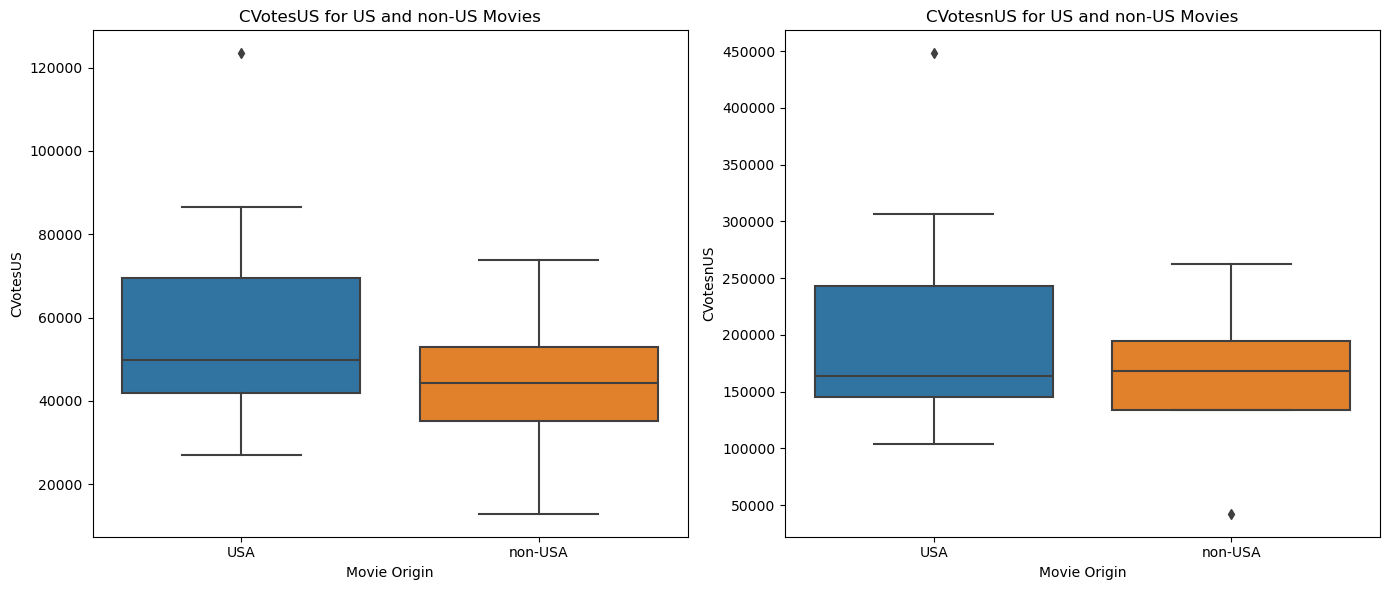

In [33]:
# Box plot - 1: CVotesUS(y) vs IFUS(x)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for CVotesUS
sns.boxplot(x='IFUS', y='CVotesUS', data=movies, ax=axs[0])
axs[0].set_title('CVotesUS for US and non-US Movies')
axs[0].set_xlabel('Movie Origin')
axs[0].set_ylabel('CVotesUS')

# Boxplot for CVotesnUS
sns.boxplot(x='IFUS', y='CVotesnUS', data=movies, ax=axs[1])
axs[1].set_title('CVotesnUS for US and non-US Movies')
axs[1].set_xlabel('Movie Origin')
axs[1].set_ylabel('CVotesnUS')

plt.tight_layout()
plt.show()

**`Inferences:`** Write your two inferences/observations below:
- Inference 1:  The median of CVotesUS and CVotesnUS for US movies is higher than that for non-US movies.
- Inference 2:  There is greater variability in the number of votes received by US movies from both US and non-US users compared to non-US movies. This is shown by the larger interquartile range and overall range for CVotesUS and CVotesnUS in US movies compared to non-US movies.

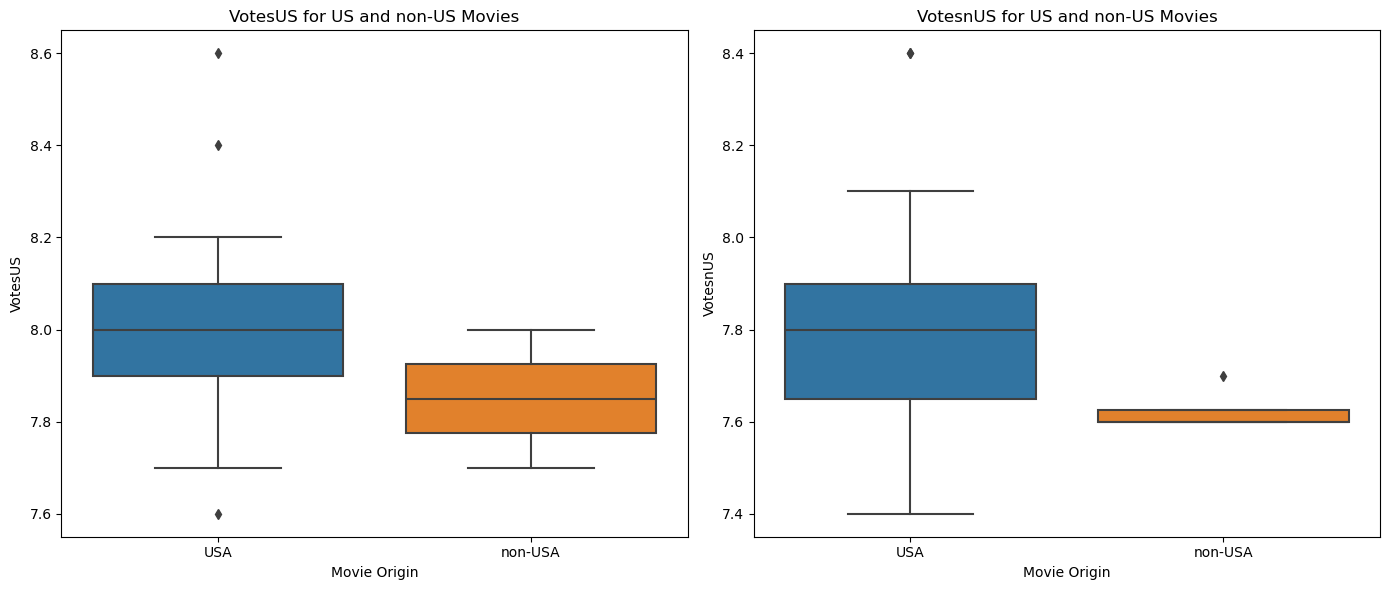

In [34]:
# Box plot - 2: VotesUS(y) vs IFUS(x)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for VotesUS
sns.boxplot(x='IFUS', y='VotesUS', data=movies, ax=axs[0])
axs[0].set_title('VotesUS for US and non-US Movies')
axs[0].set_xlabel('Movie Origin')
axs[0].set_ylabel('VotesUS')

# Boxplot for VotesnUS
sns.boxplot(x='IFUS', y='VotesnUS', data=movies, ax=axs[1])
axs[1].set_title('VotesnUS for US and non-US Movies')
axs[1].set_xlabel('Movie Origin')
axs[1].set_ylabel('VotesnUS')

plt.tight_layout()
plt.show()



**`Inferences:`** Write your two inferences/observations below:
- Inference 1: US movies tend to receive higher average votes from US users compared to non-US movies.
- Inference 2: Non-US movies receive less varied votes from non-US users compared to US movies, as shown by the smaller range and interquartile range in the VotesnUS for non-US movies.

-  ###  Subtask 3.5:  Top 1000 Voters Vs Genres

You might have also observed the column `CVotes1000`. This column represents the top 1000 voters on IMDb and gives the count for the number of these voters who have voted for a particular movie. Let's see how these top 1000 voters have voted across the genres. 

1. Sort the dataframe genre_top10 based on the value of `CVotes1000`in a descending order.

2. Make a seaborn barplot for `genre` vs `CVotes1000`.

3. Write your inferences. You can also try to relate it with the heatmaps you did in the previous subtasks.




In [35]:
# Sorting by CVotes1000

genre_top10_sorted = df_add.sort_values(by='CVotes1000', ascending=False)


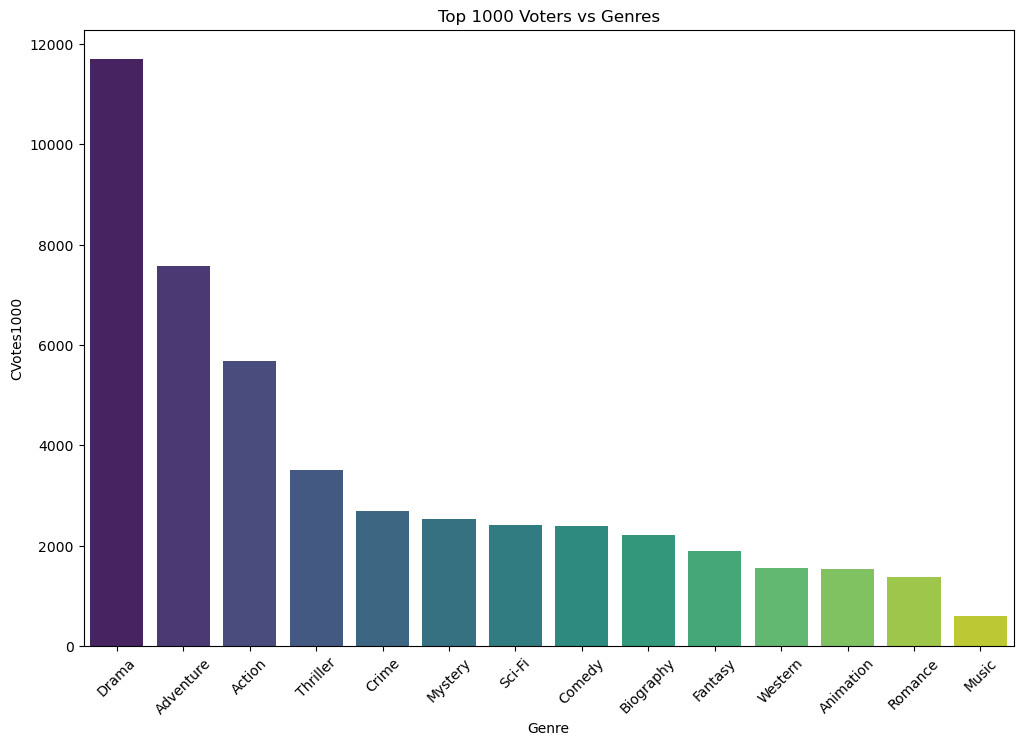

In [37]:
# Bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='genres', y='CVotes1000', data=genre_top10_sorted, palette='viridis')
plt.title('Top 1000 Voters vs Genres')
plt.xlabel('Genre')
plt.ylabel('CVotes1000')
plt.xticks(rotation=45)
plt.show()


**`Inferences:`** Write your inferences/observations here.
-> Drama is the top 1000 voters have voted across the genres and Music is the least

**`Checkpoint 6:`** The genre `Romance` seems to be most unpopular among the top 1000 voters.

With the above subtask, your assignment is over. In your free time, do explore the dataset further on your own and see what kind of other insights you can get across various other columns.